<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Version_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Intro a Ciencia de Datos

Luis Fernando Erasmo Morales Carreto

Alfonso Tonatiuh Moreno Vega

Alberto Sánchez de Aparicio Calvillo



In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

from sklearn.tree import plot_tree

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


In [ ]:
#df=pd.read_csv("/p4.csv")

In [ ]:
df=pd.read_csv("/content/p4.csv")

Obtenemos algo de información inicial del dataset. A primera vista, vemos que cada variable tiene diferente cantidad de entradas no nulas, entonces lo tendremos en cuenta. También vemos que la variable 9 parece que sólo tiene 42's.

In [ ]:
df.info()
df.head()
y=df.iloc[:,0]
print(y.value_counts(sort=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86910 entries, 0 to 86909
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  86910 non-null  int64  
 1   var1    86853 non-null  float64
 2   var2    86840 non-null  float64
 3   var3    86856 non-null  float64
 4   var4    86845 non-null  float64
 5   var5    86841 non-null  float64
 6   var6    86851 non-null  float64
 7   var7    86840 non-null  float64
 8   var8    86854 non-null  float64
 9   var9    85910 non-null  float64
 10  var10   85910 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 7.3 MB
target
0    78941
1     7969
Name: count, dtype: int64


Cortamos el dataset en variables y target. De las variables, nos fijamos en los valores extremos y eliminamos aquellos datos que son más grandes o más chicos que 2000. Creamos dos nuevos datasets (variables y target) que no tengan estos valores extremos.

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


dropear=pd.DataFrame()
for i in range(0,10):
  dropear=pd.concat([dropear,x[x.iloc[:,i] >= 2000]])
  dropear=pd.concat([dropear,x[x.iloc[:,i] <= -2000]])

drop_index=dropear.index
x_sin_extremos = x.iloc[:].drop(drop_index)
target_sin_extremos = y.iloc[:].drop(drop_index)


print(x_sin_extremos.describe())
#for i in

               var1          var2          var3          var4          var5  \
count  86353.000000  86340.000000  86356.000000  86345.000000  86341.000000   
mean     110.931077     46.548752      0.481964      1.805768     12.678184   
std       34.828326      9.268443      1.441763      8.384362     39.901559   
min      -69.880644      5.756669     -4.249417    -26.983087   -121.890669   
25%       91.898438     40.552547     -0.303669     -2.491378     -9.069573   
50%      113.646472     46.746900      0.281207      0.481958      4.463412   
75%      133.042885     52.533504      1.037937      4.752042     28.171329   
max      263.899304    113.381120     10.641146     77.304693    289.624979   

               var6          var7          var8     var9         var10  
count  86351.000000  86340.000000  86354.000000  85910.0  85910.000000  
mean      26.339941      8.305837    105.081171     42.0      0.481983  
std       26.451874      6.104990    144.053519      0.0      1.44154

Contamos cuántos elementos tenemos con target 0 y con target 1 después de eliminar las variables con un valor extremo extraño. Aquí notamos un sesgo gigantesco entre los targets 0 y 1.

In [ ]:
print(target_sin_extremos.value_counts(sort=True))
print(y.value_counts(sort=True))
#for i in df.columns:
#  print(i)
#  print(df[i].value_counts(sort=True))

print(len(target_sin_extremos))

#df.describe()

target
0    78489
1     7921
Name: count, dtype: int64
target
0    78941
1     7969
Name: count, dtype: int64
86410


In [ ]:
df_ext=x_sin_extremos
df_ext["target"]=target_sin_extremos

Ahora quitamos las filas que tienen valores NaN y creamos otro dataset sin extremos y sin nans.

In [ ]:
#También podemos hacer otro dataset, que además de no tener los valores
# extremos, rellene los NaNs con el promedio:
df_ext_sinna=df_ext.dropna()
#Reemplazar valores faltantes con el promedio
df_ext_na=pd.DataFrame()
for i in range(11):
  #df_ext_na=df_ext.iloc[:,i].fillna(np.mean(df_ext.iloc[:,i]),inplace=True)
  promedio=np.mean(df_ext.iloc[:,i])
  new_vals=df_ext.iloc[:,i].fillna(promedio)
  df_ext_na=pd.concat([df_ext_na,new_vals],axis=1)

x_ext_na=df_ext_na.iloc[:,:-1]
y_ext_na=df_ext_na.iloc[:,-1]

y_ext_sinna=df_ext_sinna.iloc[:,-1]
print(len(y_ext_sinna))
x_ext_sinna=df_ext_sinna.iloc[:,:-1]

85910


Hacemos una matriz de correlaciones entre las variables para ver qué rollo.

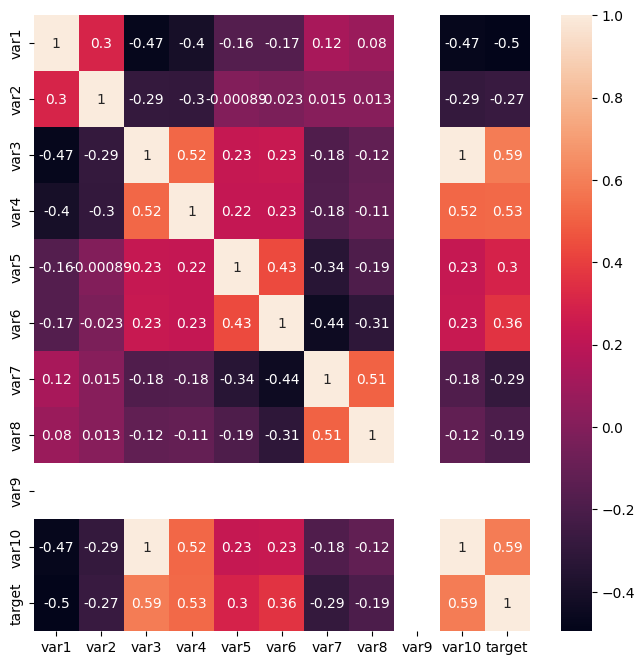

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_ext_sinna.corr(),annot=True)
plt.show()

Veamos qué sucede si intentamos hacer PCA. Creamos la gráfica de varianza acumulada para ver cómo se comporta con respecto al número de variables a usar. Decidimos no utilizar PCA porque realmente no elimina tantas variables. Las variables que elimina las podemos eliminar a manopla: La variable 9 por tener sólamente números 42 no va a aportar información adicional a la clasificación de datos; y la variable 10 tiene una correlación de 1 con la variable 3 y encima se encuentran bajo la misma distribución aproximadamente.

Forma de los valores propios: (10,)
Forma de los vectores propios: (10, 10)


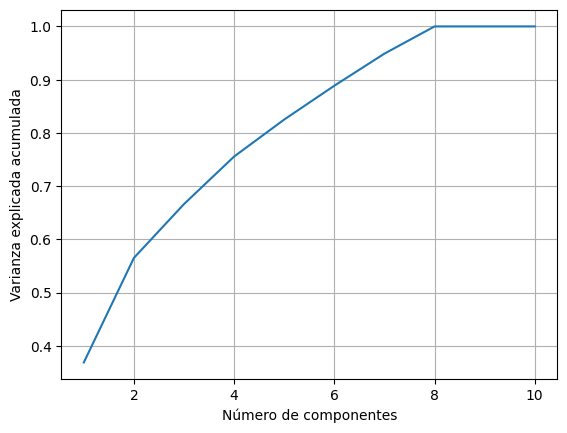

[0.36877453 0.56514682 0.66628704 0.75560436 0.82509111 0.88862395
 0.94888766 0.99999378 1.         1.        ]
8


In [ ]:
from os import X_OK
M_mean = x_ext_sinna.mean()
M_std = x_ext_sinna.std()
Zm = (x_ext_sinna - M_mean) / M_std
Zm = Zm.fillna(0)
c = Zm.cov()
eigenvalues, eigenvectors = np.linalg.eig(c)
#print('Valores propios:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

n_components = np.argmax(explained_var >= 0.99) + 1
print(explained_var)
print(n_components)

Quitamos var10 y var9 y escalamos los datos para después comenzar con los modelos de clasificación random forest, gradient boost y una red neuronal.

In [ ]:
x_ext_sinna=x_ext_sinna.iloc[:,:8]
scaler = StandardScaler()
x_ext_sinna_scaled = pd.DataFrame(scaler.fit_transform(x_ext_sinna))

print(type(x_ext_sinna))
print(type(x_ext_sinna_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Random forest:

In [ ]:
print(len(x_ext_sinna))
X_train, X_test, y_train, y_test =train_test_split(x_ext_sinna_scaled,y_ext_sinna,
                                                   test_size=0.2,shuffle=True,stratify=y_ext_sinna)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced")

rf_clf.fit(X_train, y_train)

#clf_ruido=DecisionTreeClassifier(random_state=123)
#clf_ruido.fit(X_train,y_train)
train_accuracy = metrics.accuracy_score(y_train, rf_clf.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, rf_clf.predict(X_test))

print(train_accuracy)
print(test_accuracy)

#X_train_valid = X_train
#y_train_valid = y_train
#X_test = X_test
#y_test = y_test
#X_train_valid, X_test, y_train_valid, y_test =train_test_split(x_ext_sinna_scaled,y_ext_sinna,
#                                                               test_size=0.2,shuffle=True,stratify=y_ext_sinna)
X_train, X_test, y_train, y_test =train_test_split(x_ext_sinna_scaled,y_ext_sinna, test_size=0.2,
                                                   shuffle=True,stratify=y_ext_sinna)

X_train_valid = X_train
y_train_valid = y_train
X_test = X_test
y_test = y_test
kf = KFold(5)
accuracies=[]
weights=[]
for indices_t, indices_v in kf.split(X_train_valid):
  X_train = X_train_valid.iloc[indices_t]
  X_valid = X_train_valid.iloc[indices_v]
  y_train = y_train_valid.iloc[indices_t]
  y_valid = y_train_valid.iloc[indices_v]
  rf_clf.fit(X_train, y_train)

  #print(len(indices_t),metrics.accuracy_score(y_test,clf.predict(X_test)))
  accuracies.append(metrics.accuracy_score(y_test,rf_clf.predict(X_test)))
  weights.append(len(indices_t))
#print(weights, accuracies)
print(f"La precisión ponderada total del modelo es de: {round(np.average(accuracies, weights=weights),4)}")

85910
0.9426725643114887
0.9431381678500756
La precisión ponderada total del modelo es de: 0.9429


### Gradient Boost

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,learning_rate=0.1, random_state=123)
X_train, X_test, y_train, y_test =train_test_split(x_ext_sinna_scaled,y_ext_sinna, test_size=0.2)
gb_clf.fit(X_train, y_train)
train_accuracy = metrics.accuracy_score(y_train, gb_clf.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, gb_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)

X_train_valid = X_train
y_train_valid = y_train
X_test = X_test
y_test = y_test
kf = KFold(5)
accuracies=[]
weights=[]
for indices_t, indices_v in kf.split(X_train_valid):
  X_train = X_train_valid.iloc[indices_t]
  X_valid = X_train_valid.iloc[indices_v]
  y_train = y_train_valid.iloc[indices_t]
  y_valid = y_train_valid.iloc[indices_v]
  gb_clf.fit(X_train, y_train)
  #print(len(indices_t),metrics.accuracy_score(y_test,clf.predict(X_test)))
  accuracies.append(metrics.accuracy_score(y_test,gb_clf.predict(X_test)))
  weights.append(len(indices_t))
#print(weights, accuracies)
print(f"La precisión ponderada total del modelo es de: {round(np.average(accuracies, weights=weights),4)}")

0.9670294494238156
0.964905133279013
La precisión ponderada total del modelo es de: 0.9647


### Parameter Grid para una red neuronal

In [ ]:

parametros = {"activation": ["tanh", "relu","identity"],"hidden_layer_sizes": [(1,1), (1,2), (1,5), (1,10), (1,20), (1,50), (2,1), (2,2), (2,5), (2,10), (2,20), (2,50), (5,1), (5,2), (5,5), (5,10), (5,20), (5,50), (10,1), (10,2), (10,5), (10,10), (10,20), (10,50),(20,1), (20,2), (20,5), (20,10), (20,20), (20,50),(50,1), (50,2), (50,5), (50,10), (50,20), (50,50)]}
resultados = []

for configuracion in ParameterGrid(parametros):
  #X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_ext_sinna,y_ext_sinna, test_size=0.2)
  mlp = MLPClassifier(**configuracion, max_iter=1000)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  precision = round(accuracy_score(y_test, y_pred),8)
  resultados.append((configuracion, precision))

resultados_ordenados = sorted(resultados, key=lambda x: x[1], reverse=True)

print("\nLas 10 mejores configuraciones son:")
for config, precision in resultados_ordenados[:10]:
    print(f"Configuración: {config}, Precisión: {precision}")


Las 10 mejores configuraciones son:
Configuración: {'activation': 'relu', 'hidden_layer_sizes': (50, 1)}, Precisión: 0.96734955
Configuración: {'activation': 'tanh', 'hidden_layer_sizes': (50, 2)}, Precisión: 0.96729135
Configuración: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20)}, Precisión: 0.96723315
Configuración: {'activation': 'relu', 'hidden_layer_sizes': (20, 2)}, Precisión: 0.96723315
Configuración: {'activation': 'relu', 'hidden_layer_sizes': (20, 20)}, Precisión: 0.96723315
Configuración: {'activation': 'relu', 'hidden_layer_sizes': (50, 10)}, Precisión: 0.96723315
Configuración: {'activation': 'tanh', 'hidden_layer_sizes': (10, 1)}, Precisión: 0.96717495
Configuración: {'activation': 'tanh', 'hidden_layer_sizes': (20, 2)}, Precisión: 0.96717495
Configuración: {'activation': 'relu', 'hidden_layer_sizes': (20, 10)}, Precisión: 0.96717495
Configuración: {'activation': 'tanh', 'hidden_layer_sizes': (5, 1)}, Precisión: 0.96711675


### Red neuronal:

In [ ]:
#X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_ext_sinna,y_ext_sinna, test_size=0.2)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_split)
#X_test_scaled = scaler.transform(X_test_split)
mlp = MLPClassifier(activation= 'tanh', hidden_layer_sizes= (50, 2), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
precision = round(accuracy_score(y_test, y_pred),8)
print(precision)

X_train_valid = X_train
y_train_valid = y_train
X_test = X_test
y_test = y_test
kf = KFold(5)
accuracies=[]
weights=[]
for indices_t, indices_v in kf.split(X_train_valid):
  X_train = X_train_valid.iloc[indices_t]
  X_valid = X_train_valid.iloc[indices_v]
  y_train = y_train_valid.iloc[indices_t]
  y_valid = y_train_valid.iloc[indices_v]
  mlp.fit(X_train, y_train)
  #print(len(indices_t),metrics.accuracy_score(y_test,clf.predict(X_test)))
  accuracies.append(metrics.accuracy_score(y_test,mlp.predict(X_test)))
  weights.append(len(indices_t))
#print(weights, accuracies)
print(f"La precisión ponderada total del modelo es de: {round(np.average(accuracies, weights=weights),4)}")

0.96589454
La precisión ponderada total del modelo es de: 0.9656


Creamos las matrices de confusión de cada modelo para evaluar la confiabilidad de cada una para predecir los datos. Recordamos que para random forest, implementamos el parámetro class_weight="balanced"

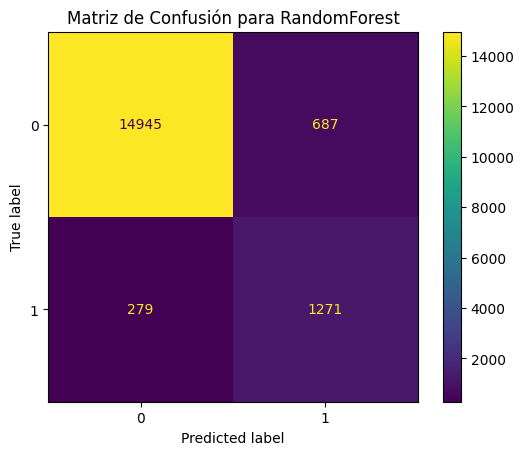

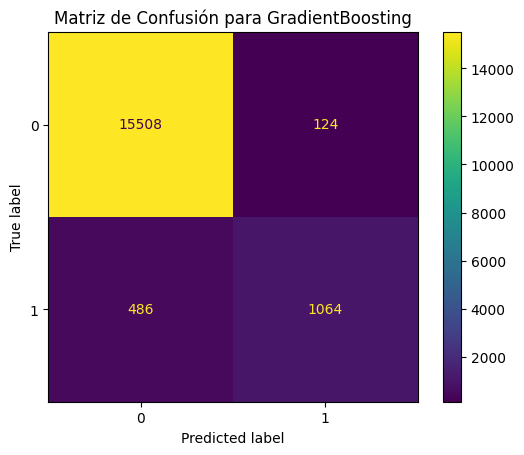

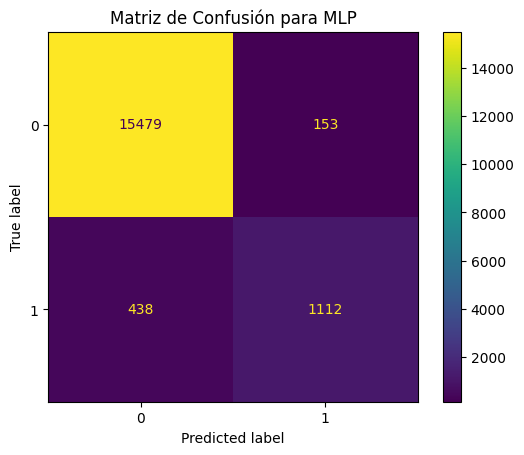

Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15632
           1       0.65      0.82      0.72      1550

    accuracy                           0.94     17182
   macro avg       0.82      0.89      0.85     17182
weighted avg       0.95      0.94      0.95     17182

Modelo Gradient Boosting:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15632
           1       0.90      0.69      0.78      1550

    accuracy                           0.96     17182
   macro avg       0.93      0.84      0.88     17182
weighted avg       0.96      0.96      0.96     17182

Modelo MLPClassifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15632
           1       0.88      0.72      0.79      1550

    accuracy                           0.97     17182
   macro avg       0.93      0.85      0.89     17182
weig

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, rf_clf.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0', '1'])
disp_rf.plot()
plt.title("Matriz de Confusión para RandomForest")
plt.show()

cm_gb = confusion_matrix(y_test,gb_clf.predict(X_test))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['0', '1'])
disp_gb.plot()
plt.title("Matriz de Confusión para GradientBoosting")
plt.show()

cm_mlp = confusion_matrix(y_test, mlp.predict(X_test))
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['0', '1'])
disp_mlp.plot()
plt.title("Matriz de Confusión para MLP")
plt.show()

from sklearn.metrics import classification_report

print("Modelo Random Forest:")
print(classification_report(y_test, rf_clf.predict(X_test)))
print("Modelo Gradient Boosting:")
print(classification_report(y_test, gb_clf.predict(X_test)))
print("Modelo MLPClassifier:")
print(classification_report(y_test, mlp.predict(X_test)))

In [ ]:
import joblib
joblib.dump(rf_clf, "modelo_randforest.pkl")


['modelo_randforest.pkl']

In [ ]:
joblib.dump(mlp, "modelo_mlp.pkl")

['modelo_mlp.pkl']

In [ ]:
  from google.colab import files
  files.download('modelo_randforest.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("modelo_mlp.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Declaratoria sobre uso de IA

Se usó IA para detectar que modelo MLPClassifier es mejor; ya que se hicieron 108 modelos de los cuales solo queríamos conocer los mejores. Exactamente se usó en la línea:

resultados_ordenados = sorted(resultados, key=lambda x: x[1], reverse=True).

También los usamos para indagar de manera más general la utilidad de algunas funciones y comandos; así como obtener algunos parámetros. Por ejemplo, en el RandomForest y GBClassifier lo usamos para obtener la mejor configuración (relativamente).

Fue muy útil ya que pudimos aclarar varias dudas y así estar seguros de nuestros prcedimientos y por ende de nuestros resultados, es decir, los modelos finales a entregar.